Step 35


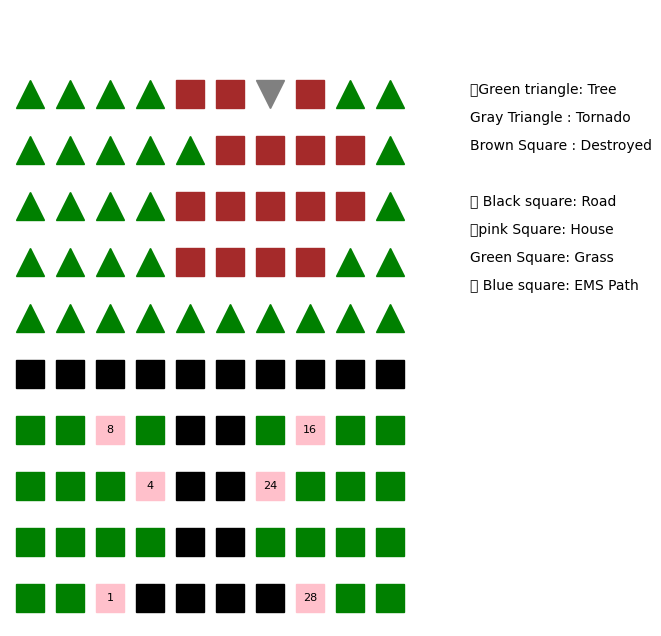


Rescue Summary:
House at (9, 2) rescued at minute 1
House at (7, 3) rescued at minute 4
House at (6, 2) rescued at minute 8
House at (6, 7) rescued at minute 16
House at (7, 6) rescued at minute 24
House at (9, 7) rescued at minute 28


In [47]:
# Step 1: Create the forest with T-road, fireproof zone, top trees, and houses
forest = np.array([
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [4, 4, 4, 4, 4, 4, 4, 4, 4, 4],  # horizontal road
    [3, 3, 22, 3, 4, 4, 3, 22, 3, 3],
    [3, 3, 3, 22, 4, 4, 22, 3, 3, 3],
    [3, 3, 3, 3, 4, 4, 3, 3, 3, 3],
    [3, 3, 22, 4, 4, 4, 4, 22, 3, 3]
])

# Step 2: Randomly ignite trees in the top row
forest[0][np.random.choice(10)]=13

# Step 3: tornado moves
def step_forest(forest):
    new_forest = forest.copy()
    N = forest.shape[0]

    for i in range(N):
        for j in range(N):
            if forest[i, j]==13:
                new_forest[i,j]=14
                spread_targets=[]
                for neighbor in [(i+1,j),(i-1, j),(i, j+1),(i, j-1)]:
                    a,b=neighbor
                    if 0 <= a < N and 0 <= b < N:
                        spread_targets.append(neighbor)
                new_forest[spread_targets[np.random.choice(len(spread_targets))]]=13
    step_forest.counter += 1
    return new_forest

step_forest.counter = 0

# Step 4: Plotting function

def plotgrid(myarray, highlight_roads=[], house_status={}):
    fig, ax = plt.subplots(figsize=(8, 8))
    x_range = np.linspace(0, myarray.shape[1] - 1, myarray.shape[1])
    y_range = np.linspace(0, myarray.shape[0] - 1, myarray.shape[0])
    x_indexes, y_indexes = np.meshgrid(x_range, y_range)

    tr_x = x_indexes[myarray == 1]
    tr_y = y_indexes[myarray == 1]
    torn_x = x_indexes[myarray == 13]
    torn_y = y_indexes[myarray == 13]
    dest_x = x_indexes[myarray == 14]
    dest_y = y_indexes[myarray == 14]
    safe_x = x_indexes[myarray == 3]
    safe_y = y_indexes[myarray == 3]
    road_x = x_indexes[myarray == 4]
    road_y = y_indexes[myarray == 4]
    house_x = x_indexes[myarray == 22]
    house_y = y_indexes[myarray == 22]

    ax.plot(tr_x, myarray.shape[0] - tr_y - 1, '^g', markersize=20)
    ax.plot(torn_x, myarray.shape[0] - torn_y - 1, 'v', color='gray', markersize=20)
    ax.plot(dest_x, myarray.shape[0] - dest_y - 1, 's', color='brown', markersize=20)
    ax.plot(safe_x, myarray.shape[0] - safe_y - 1, 'gs', markersize=20)
    ax.plot(road_x, myarray.shape[0] - road_y - 1, 'ks', markersize=20)

    # Pink house blocks
    ax.plot(house_x, myarray.shape[0] - house_y - 1, 's', color='pink', markersize=20)

    for (y, x) in highlight_roads:
        ax.plot(x, myarray.shape[0] - y - 1, 'bs', markersize=20)

    # Add labels for rescued houses
    for (y, x), step in house_status.items():
        ax.text(x, myarray.shape[0] - y - 1, f"{step}", color='black', fontsize=8, ha='center', va='center')

    # Draw legend
    ax.text(11, 9, "🔺Green triangle: Tree", fontsize=10)
    ax.text(11, 8.5, "Gray Triangle : Tornado", fontsize=10)
    ax.text(11, 8, "Brown Square : Destroyed", fontsize=10)
    ax.text(11, 7, "⬛ Black square: Road", fontsize=10)
    ax.text(11, 6.5, "🟪pink Square: House", fontsize=10)
    ax.text(11, 6, "Green Square: Grass", fontsize=10)
    ax.text(11, 5.5, "🟦 Blue square: EMS Path", fontsize=10)

    ax.set_xlim([-0.5, myarray.shape[1] + 5])
    ax.set_ylim([-0.5, myarray.shape[0] + 0.5])
    plt.axis('off')
    plt.show()

# Rescue steps and timers
rescue_steps = {
    1: [(9, 2)], 2: [(9, 3)], 3: [(9, 4)],
    4: [(7, 3)], 5: [(7, 4)], 6: [(8, 4)], 7: [(9, 4)],
    8: [(6, 2)], 9: [(5, 2)], 10: [(5, 3)], 11: [(5, 4)], 12: [(6, 4)],
    13: [(7, 4)], 14: [(8, 4)], 15: [(9, 4)],
    16: [(6, 7)], 17: [(5, 7)], 18: [(5, 6)], 19: [(5, 5)],
    20: [(6, 5)], 21: [(7, 5)], 22: [(8, 5)], 23: [(9, 5)],
    24: [(7, 6)], 25: [(7, 5)], 26: [(8, 5)], 27: [(9, 5)],
    28: [(9, 7)], 29: [(9, 6)], 30: [(9, 5)]
}

rescue_targets = {(9,2), (7,3), (6,2), (6,7), (7,6), (9,7)}
rescued_times = {}
houses_destroyed=[]

# Step 6: Run the simulation
for t in range(36):
    clear_output(wait=True)
    print(f"Step {t}")
    highlights = rescue_steps.get(t, [])

    # Log rescue time
    for coord in highlights:
        if coord in rescue_targets and coord not in rescued_times and coord not in houses_destroyed:
            rescued_times[coord] = t
    for i in range(10):
        for j in range(10):
            if forest[i, j]==13:
                if (i,j) in [(9,2), (7,3), (6,2), (6,7), (7,6), (9,7)] and (i,j) not in rescued_times:
                    houses_destroyed.append((i,j))
                elif (i,j) in highlights:
                    print('The tornado hit the EMS')
    plotgrid(forest, highlight_roads=highlights, house_status=rescued_times)
    forest = step_forest(forest)
    time.sleep(0.5)

# Final rescue summary
print("\nRescue Summary:")
for house, t in rescued_times.items():
    print(f"House at {house} rescued at minute {t}")
